<a href="https://colab.research.google.com/github/isabellasims/Genetic-algorithm/blob/master/Evolutionary_Computation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem description**

To set up a problem for evolutionary computation, we need two things: 1) a representation for the space to be searched, and 2) a fitness function telling us how close we are to our goal.

For this example we'll use 10-character strings as the problem space to be searched. They are both the genome and phenotype (the genome is a string, and the output we evaluate is the same string).

We'll start with a goal of finding a string of all capital letters.

Comment: Obviously if we wanted an all-caps string, we know how to produce one directly. But in more complicated evolutionary problems we won't know how to generate the desired output directly. This example shows how an algorithm can find an example meeting our desired criteria purely by being given a fitness function, without knowing anything specific about how to produce solutions.

https://rosettacode.org/wiki/Monty_Hall_problem
But you can learn from it: things that seem equivalent (like two doors) might not be. You might have more information than you think about those things, making one a better statistical choice

In [0]:
from random import choice, randint, random
import matplotlib.pyplot as plt

In [0]:
charset = list("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ")
#stringLength = 10
stringLength = 3

# goal is an all-caps string
# higher fitness = more uppercase letters
goal = ["f","i","t"]
def fitness(example):
  f = 0 
  # more specific fitness = faster genetic alg
  for ch in example:
    if ch == "i" or ch == "f" or ch == "t": 
      f += 1     
  for i in range(len(example)):
    if example[i] == goal[i]:
      f += 1
    if example[i] in goal:
      f += 1     
  return f



def isGoal(example):
  # return fitness(example) == stringLength 
  if example == goal:
    return True #change is goal so it accepts my goal
  

In [5]:
print(fitness(["i","i","t"]))

8


**Random search**

Before we get into the genetic algorithm itself, let's start with a baseline: just completely randomly guessing strings until we get one we want.

**Genetic Algorithm: Better than random guessing**

A genetic algorithm will let us get to our goal faster, by keeping a *population* of random guesses, and mutating and crossing over only the closer guesses ("more fit individuals"), instead of guessing from scratch each time.




Let's first define those two utility functions: crossover and mutation.

In [0]:
mutationRate = 0.1
# Change for dif speeds


# proportion of "genes" to randomly flip each tie ## edit this takes rand char from example & generates random # between 0 and 1
# if its less than mutation rate changes that caracter
def mutate(example): 
  return [(choice(charset) if random() < mutationRate else ch) for ch in example] # generates random # btwn 0 & 1 and if less than mutation rate, it generates that charcter

In [0]:
def crossover(parent1, parent2): # 
  #cuts up and puts two halves together
  # pick a random point to cross over at
  crossOverPoint = randint(1,stringLength) #
  return parent1[:crossOverPoint] + parent2[crossOverPoint:] # returns new gene set - half from p1 half from p2 

Here, we see that the odds of mutation are higher given more genes



```
`# This is formatted as code`
```

And here's an example of crossing over two strings:

In [0]:
populationSize = 50
stringLength = 3
x = []
y = []
def geneticAlgorithm():
  iterations = 0

  # the initial population is populationSize random strings
  population = [[choice(charset) for _ in range(stringLength)] for _ in range(populationSize)] # array of arrays
  print(population)
  
  while True:
    iterations += 1
    # do any of our population's individuals satisfy the goal?
    for individual in population:
      if (isGoal(individual)): # sees if its all caps
        print(f"Found goal in {iterations} iterations at index {population.index(individual)}")
        return individual
    
    # if not, crossover and mutate to get a new generation
    
    # sort the current population by descending order of fitness
    population.sort(key=fitness, reverse=True) # RANKING... better strings at top (sort does l to g)
    
    
    # take the top 10 (arbitrary number) and make them parents of the new generation
    parents = population[:10] # ---> top 10 candidates
    fittest = population[:1]
    fittest = fittest[0] # unnesting list in order to plot and guage fitness
    print(fittest)
   
    x.append(iterations)
    print(x)
   
    y.append(fitness(fittest))
    #plt.plot(iterations, fitness(fittest))
    
    print(fitness(fittest))
    #print("sorted",parents)
    # make the next generation by randomly selecting two parents to
    # crossover, and then mutating the result, until we have 50 new individuals
    population = [mutate(crossover(choice(parents),choice(parents))) for _ in range(populationSize)] # GENERATING NEW POPULATION FROM PARENTS
  print("x" , x)

    
     
  
  

In [0]:
x = []
y = []
cords = []
populationSize = 50
stringLength = 3
def getXY():
  iterations = 0
  population = [[choice(charset) for _ in range(stringLength)] for _ in range(populationSize)] # array of arrays
 
  while True:
    iterations += 1
    for individual in population:
      if (isGoal(individual)): # sees if its all caps
        print(f"Found goal in {iterations} iterations at index {population.index(individual)}")
        cords.append(x)
        cords.append(y)
        return cords
    # do any of our population's individuals satisfy the goal?
    
    # if not, crossover and mutate to get a new generation
    
    # sort the current population by descending order of fitness
    population.sort(key=fitness, reverse=True) # RANKING... better strings at top (sort does l to g)
    
    
    # take the top 10 (arbitrary number) and make them parents of the new generation
    parents = population[:10] # ---> top 10 candidates
    fittest = population[:1]
    fittest = fittest[0] # unnesting list in order to plot and guage fitness
   
   
    x.append(iterations) 
    y.append(fitness(fittest))  
    population = [mutate(crossover(choice(parents),choice(parents))) for _ in range(populationSize)] # GENERATING NEW POPULATION FROM PARENTS


Found goal in 4 iterations at index 14
[1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1, 2, 3, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 1, 2, 3] [4, 6, 8, 8, 8, 8, 8, 8, 8, 3, 5, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 6, 6, 5, 5, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 6, 8]


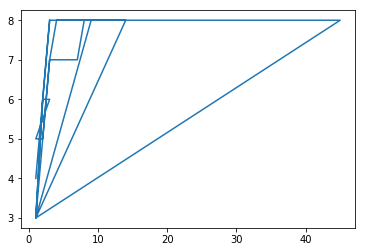

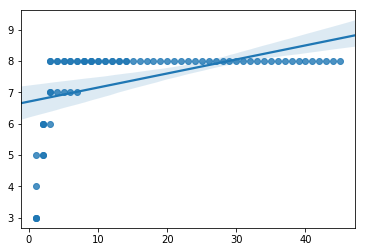

In [16]:
getXY()
x = cords[0]
y = cords[1]
print(x , y)
plt.plot(x,y)
plt.show()

import pandas as pd
import seaborn as sns

sns.regplot(x,y)

In [0]:
geneticAlgorithm()